In [1]:
from PEPV import *       # import this package
import torch             # import the necessary python packages
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'PEPV'

In [ ]:
r = Regimen('DTG', 24, (-48, 2400), 50, 3, 1)
e = EfficacyPredictor()
e.add_regimen(r)
e.compute_extinction_probability()

In [ ]:
t0, t1 = -72, 28*24
r = [[0,0,0] + [200] * 28]
r = Regimen('FTC', 24, (t0, t1), 50, 3, 1, adh_pattern=r)
r1 = [[0,0,0]+ [300] * 28]
r1 = Regimen('TDF', 24, (t0, t1), 300, 3, 1, adh_pattern=r1)
e.add_regimen(r)
e.add_regimen(r1)
e.compute_extinction_probability()

In [ ]:
# FTC: 300, -48 to 240

r = Regimen('TDF', 24, (-48, 480), 300, 10, 1)
e = EfficacyPredictor()
e.add_regimen(r)
e.compute_extinction_probability()

In [ ]:
t = torch.load('old_tdf.pt')

In [ ]:
torch.save(c, 'old_tdf.pt')

In [2]:
import time
p = [[600]+ [300] * 4]
r = Regimen('TDF', 24, (0, 120), 300, 5, 1, adh_pattern=p)
e = EfficacyPredictor()
e.add_regimen(r)
e.add_sample_files('burnssimparam.csv')
solver = rk4
e.set_ode_solver(solver)
e.set_time_step(0.002)
t = time.time()
e.compute_extinction_probability()
print(time.time() - t)

WT added
A new regimen added. please run the computation again. 
Input file changed, please run the computation again. 
ODE solver changed, please run the computation again. 
Time step changed, please run the computation again.
70.55370831489563


In [9]:
c1.to_csv('ftc.csv')

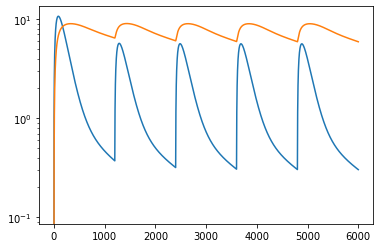

In [11]:
plt.plot(c1.iloc[:, 0])
plt.plot(c1.iloc[:, 2])
plt.yscale('log')

In [ ]:
t0, t1 = -48, 60 * 24

p0 = [0, 0] + [50] * 60
#p1 = [0, 0] + [50, 0] * 30
#p2 = [0, 0] + [50, 0, 0, 0, 0] * 12

pattern = [p0]
r = Regimen('DTG', 24, (t0, t1), 50, 30, 0, adh_pattern=pattern)

In [ ]:
e1 = EfficacyPredictor()
e1.add_regimen(r)
#e.add_mutation('G140S')
#e.link_strains('WT', 'G140S', 2.2e-5)

In [ ]:
m1 = ['G140S', 'DTG', 0.75, -0.01, 0.76]
m2 = ['N155H', 'DTG', 1.98, 0.06, 0.85]
m3 = ['Q148R', 'DTG', 1.8, 0.14, 0.65]

In [ ]:
#e_m.add_mutation(*m1)
#e_m.add_mutation(*m2)
e_m.add_mutation(*['Q148R', 'DTG', 1.8, 0.14, 0.65])
#e_m.link_strains('WT', m1[0], 2.2e-5)
#e_m.link_strains('WT', m2[0], 5.3e-7)
e_m.link_strains('WT', m3[0], 1.1e-5)
e_m.compute_extinction_probability()

In [ ]:
e_control.modify_propensity(5, (1-1.1e-5))
e_control.compute_extinction_probability()

In [ ]:
contr = e_control.get_extinction_probability()

In [ ]:
EfficacyPredictor.save_object(e_control, 'control50_1.pkl')

In [ ]:
def plot_rate(ax, mut, control, u):
    t = [i*0.02/24 for i in range(int(-48/0.02), int(60 * 24/0.02))]
    ax.plot(t, (control[:-1,0,2,0,0] - mut[:-1, 0, 2, 0,0])/(1 - mut[:-1, 0, 2, 0,0]) / u, label='0.2')
    ax.plot(t, (control[:-1,0,1,0,0] - mut[:-1, 0, 1, 0,0])/(1 - mut[:-1, 0, 1, 0,0]) / u, label='0.5')
    ax.plot(t, (control[:-1,0,0,0,0] - mut[:-1, 0, 0, 0,0])/(1 - mut[:-1, 0, 0, 0,0]) / u, label='1')
    ax.set_xlim(-2, 15)
    ax.legend(title='Adherence')
    ax.set_xlabel('Time of viral exposure relative to first dose [day]')
    ax.set_ylabel(r'$f^\prime(u)$')

In [ ]:
e.add_sample_files('../DGV50_Params.xlsx')

In [ ]:
for obj in objs:
    print(obj.get_extinction_probability().shape)
    e = obj

In [ ]:
def plot_population_backwards(tensor, ax):
    q = torch.tensor([.025,.25, .5, .75, .975], dtype=torch.double)
    quantiles = torch.quantile(tensor , q, dim=1)
    t = [i for i in range(quantiles.shape[1])]
    p_50 = quantiles[2,:]
    p_2_5 = quantiles[0,:]
    p_25 = quantiles[1,:]
    p_75 = quantiles[3,:]
    p_97 = quantiles[4,:]
    ax.plot(np.array(t)/24, p_50, lw=0.4)
    ax.fill_between(np.array(t)/24, p_2_5, p_97, color='lightgray')
    ax.fill_between(np.array(t)/24, p_25, p_75, color='gray')
    ax.set_xticks([0,2,4,6,8,10])